## Obtendo distâncias

O valor do imóvel está diretamente ligado a sua localização e também aos serviços em seu entorno. Adicionamos as **estações de metrô** e iremos calcular a distância de cada imóvel para a estação mais próxima.

In [ ]:
!pip install --upgrade geopandas
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes
!pip install --upgrade pandas

In [1]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

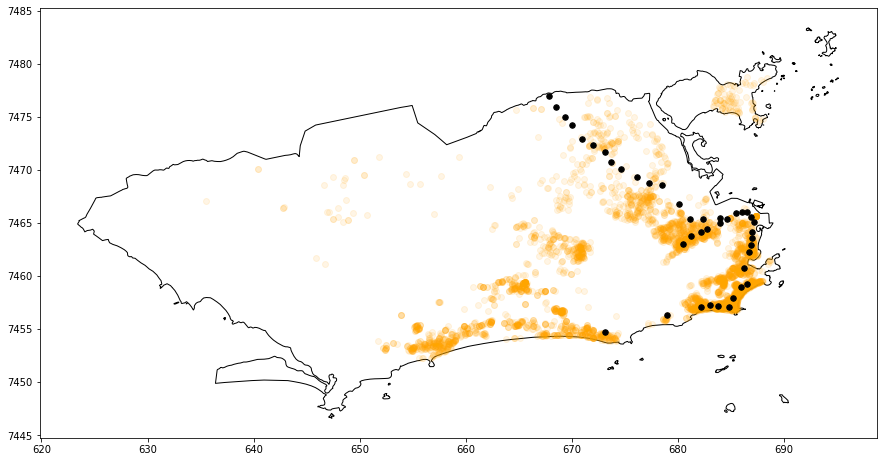

In [5]:
# Mapa
rj = gpd.read_file('/content/drive/MyDrive/Programacao/GeoPandas/Mapas/RJ/33MUE250GC_SIR.shp')
rj = rj[rj['NM_MUNICIP'] == 'RIO DE JANEIRO']

# Dados Imóveis
df_dados_imoveis = pd.read_table('/content/drive/MyDrive/Programacao/GeoPandas/Dados/dados.txt')
geometry = [Point(localizacao) for localizacao in zip(df_dados_imoveis.Longitude, df_dados_imoveis.Latitude)] # lista de Points com as localizações
crs = {'proj' : 'latlong',
       'ellps': 'WGS84',
       'datum' : 'WGS84',
       'no_defs' : True}
gdf_dados_imoveis = gpd.GeoDataFrame(df_dados_imoveis, crs = crs, geometry = geometry)

# Dados Metrô
metro = gpd.read_file('/content/drive/MyDrive/Programacao/GeoPandas/Dados/Estacoes_Metro.geojson')

# set do crs
rj = rj.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')
gdf_dados_imoveis = gdf_dados_imoveis.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')
metro = metro.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

# Imoveis dentro da cidade
esta_dentro = gdf_dados_imoveis['geometry'].within(rj.iloc[0].geometry)
gdf_dados_imoveis = gdf_dados_imoveis[esta_dentro]

# Plot
base = rj.plot(color='white', edgecolor='black', figsize=(15,15))
gdf_dados_imoveis.plot(ax = base, color='orange', figsize=(15,15), alpha = 0.1)
metro.plot(ax = base, color='black', figsize=(15,15), markersize=30)

## Obtendo a distância entre um imóvel e a estação de metrô mais próxima

In [14]:
distancias = metro.distance(gdf_dados_imoveis.iloc[0].geometry) # Distancias do primeiro imóvel para todas as estações
print('5 Primeiras distâncias:\n\n',distancias[:5])
print('\nMenor distância:', distancias.min())

5 Primeiras distâncias:

 0    25.321516
1    24.623350
2    24.224237
3    23.881158
4    23.357575
dtype: float64

Menor distância: 15.62293882499506


Automatização desse processo para todos os imóveis:

In [18]:
# Criamos uma nova coluna 'Dist_Metro'
# A função Apply itera em todo o DF e executa a função anônima.
# A função anônima é definida por:
# - Argumento: x
# - Saída: metro.distance(x).min()
# Sendo x o valor de gdf_dados_imoveis['geometry'] de cada linha do geodataframe
gdf_dados_imoveis['Dist_Metro'] = gdf_dados_imoveis['geometry'].apply(lambda x: metro.distance(x).min())
gdf_dados_imoveis.head()

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry,Dist_Metro
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (657.514 7453.832),15.622939
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (670.524 7461.803),7.530741
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (674.345 7469.440),0.736973
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (662.701 7457.284),10.718039
5,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,POINT (656.019 7453.574),17.131159


In [20]:
# Correlação entre o valor do imóvel e a distância para o metrô
corr_valor_metro = gdf_dados_imoveis['Valor'].corr(gdf_dados_imoveis['Dist_Metro'])
corr_valor_metro # -0.1956408316168689

-0.1956408316168689

O valor do imóvel e a distância para a estação do metrô possuem correlação negativa. Ou seja, quanto maior a distância até a estação do metrô, menor o valor do imóvel.

Continua na Parte 4.